# K Nearest Neighbors

### Euclidean Distance 
The purpose of this notebook is to solidify my understanding of the k-nearest neighbors algorithm using the Euclidean distance. I will be creating my own classifier and comparing its performance with the Sci-kit Learn package.

### Table of Contents
0. [Data](#data)
1. [Scratch KNN](#mine)
2. [Comparing to Sci-kit Learn](#comp)
3. [Model Evaluation](#eval)

### Results
- I was able to get the same results as the Sci-kit Learn package, so I only evaluated the model once. 
- The model performed perfectly. This is probably due to the nature of the question and simplifications I made. The KNN algorithm assumes that similar inputs yield similar outputs, and this is a safe assumption for predicting species based on physical attributes. Additionally, I simplified this from a 3-class classification problem to a binary classification problem. 

In [81]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from statistics import mode
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 0. Data <a id='data'></a>
I will be using the popularly used Iris dataset, as it is easy to work with.

In [5]:
iris = datasets.load_iris()

In [6]:
X = iris.data[:,:2] ## Only using first two features for graphing purposes
y_old = iris.target 
## Converting to binary classifier to ensure there is a clear classification, no ties 
y = []
for i in y_old:
    if i == 2:
        y.append(1)
    else:
        y.append(i)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

Text(0, 0.5, 'Sepal Width (cm)')

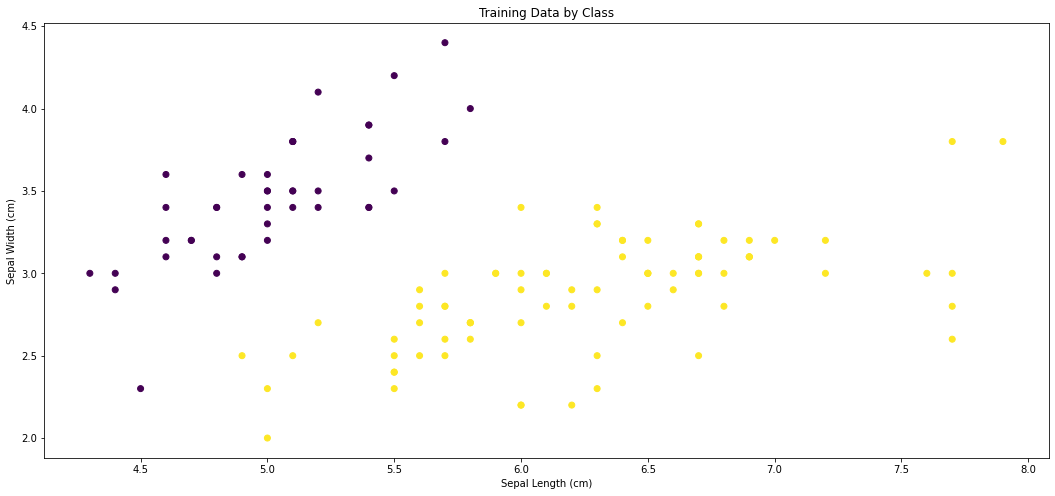

In [8]:
plt.figure(figsize=(18,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title('Training Data by Class')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

### 1. Scratch KNN <a id='mine'></a>

In [61]:
### Define k 
k = 5

### Defining distance function, can be interchanged with other distance functions 
def euclidean(pt1, pt2):
    comp1_diff = (pt2[0]-pt1[0])**2
    comp2_diff = (pt2[1]-pt1[1])**2
    euc = (comp1_diff+comp2_diff)**0.5
    return euc

preds = []
for test_point in X_test:
    ### Getting distance of each training point for the given test point
    distances = []
    for idx, training_point in enumerate(X_train):
        dist = euclidean(test_point, training_point)
        distances.append((dist, idx))
        
    ### Sorting distances in ascending order
    sorted_dist = sorted(distances)
    
    ### Getting indexes of k nearest points 
    neighbors = sorted_dist[:k]
    neighbor_idxs = []
    for n in neighbors:
        neighbor_idxs.append(n[1])
    
    ### Getting classes of k neighbors
    neighbor_classes = []
    for idx in neighbor_idxs:
        classification = y_train[idx]
        neighbor_classes.append(classification)
    
    ### Assigning classification to the test point
    pred = mode(neighbor_classes)
    preds.append(pred)    

Text(0, 0.5, 'Sepal Width (cm)')

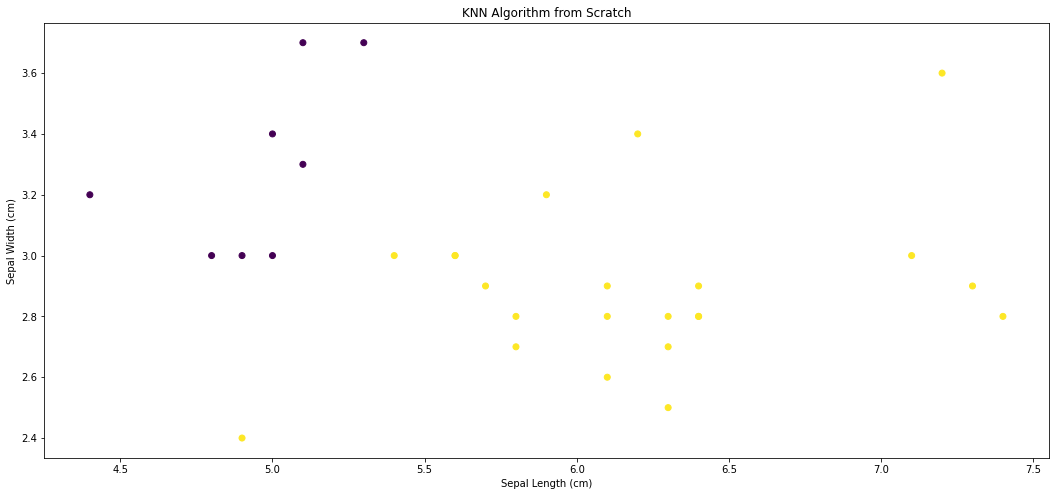

In [63]:
plt.figure(figsize=(18,8))
plt.scatter(X_test[:,0], X_test[:,1], c=preds)
plt.title('KNN Algorithm from Scratch')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

### 2. Comparing to Sci-kit Learn <a id='comp'><a/>

In [71]:
### Difference between prediction vectors
np.subtract(sk_pred, preds)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
sk_pred = knn.predict(X_test)

Text(0, 0.5, 'Sepal Width (cm)')

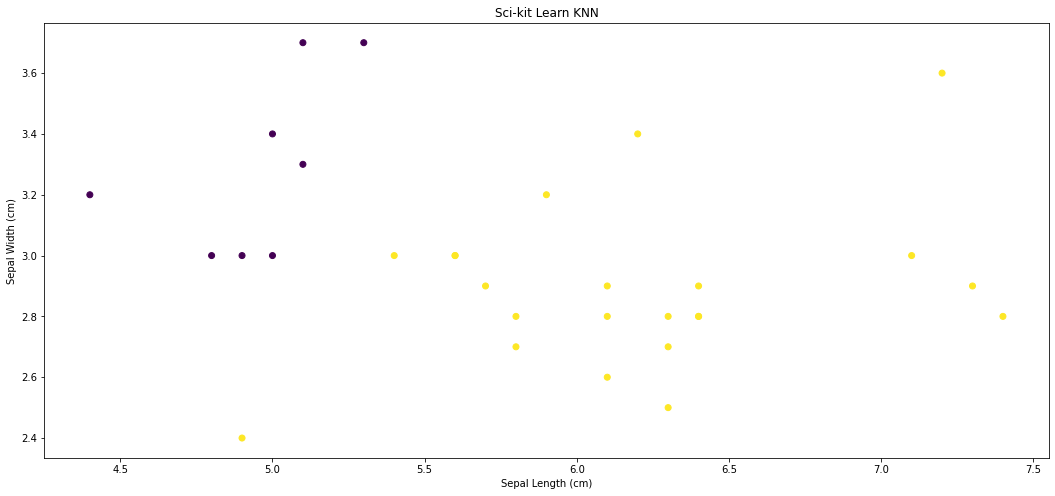

In [73]:
plt.figure(figsize=(18,8))
plt.scatter(X_test[:,0], X_test[:,1], c=sk_pred)
plt.title('Sci-kit Learn KNN')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

### 3. Model Evaluation <a id='eval'></a>

Text(0, 0.5, 'Sepal Width (cm)')

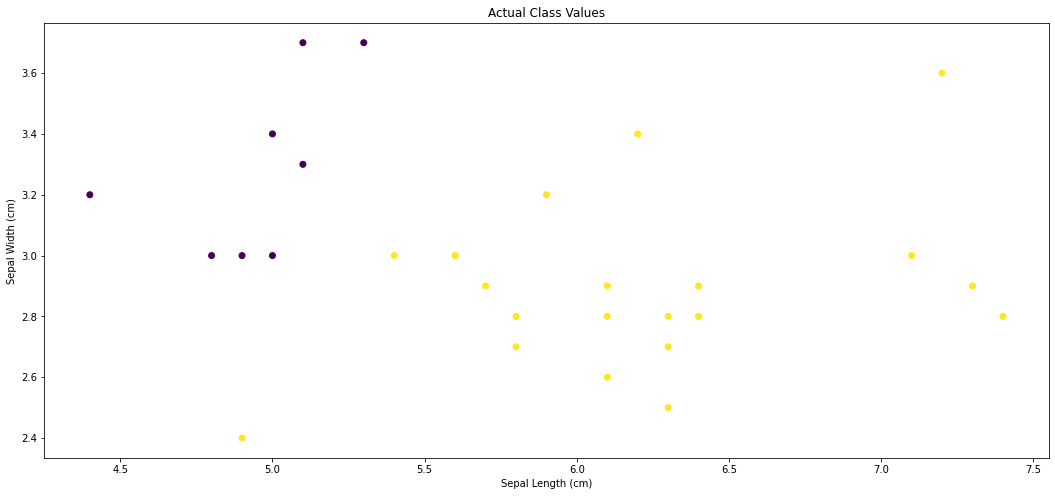

In [75]:
plt.figure(figsize=(18,8))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title('Actual Class Values')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

Text(33.0, 0.5, 'Actual')

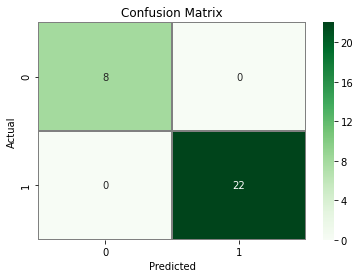

In [83]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', linecolor='gray', linewidths=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')